In [4]:
from google.colab import drive 
drive.mount('/content/drive/')
root_path = '/content/drive/My Drive/Colab Notebooks/mini project 4/Sentence Pair Classifcation'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
%cd '/content/drive/My Drive/mini project 4/Single_Sentence'

/content/drive/My Drive/mini project 4/Single_Sentence


In [3]:
!ls

 chn_senti_corp		  corpus_model_20.h5   label_dict.pk
 corpus_model_10_190.h5   corpus_model.h5      LSTM.ipynb
 corpus_model_10.h5	  documentation.gdoc   model_lstm.png
 corpus_model_20_160.h5   Example_BERT.ipynb   __pycache__
 corpus_model_20_180.h5   frequency_plot.jpg  'sentence frequency plot.png'
 corpus_model_20_190.h5   glyce		       word_dict.pk
 corpus_model_20_200.h5   ifeng


In [0]:
import os
import pandas as pd
import csv
import numpy as np

In [0]:
def read_tsv(input_file):
  with open(input_file, "r") as f:
    reader = csv.reader(f, delimiter="\t")
    lines = []
    for line in reader:
      lines.append(line)
    return lines

In [0]:
train_path = 'chn_senti_corp/train.tsv'
train = read_tsv(train_path)

In [0]:
test_path = 'chn_senti_corp/test.tsv'
test = read_tsv(test_path)

In [0]:
dev_path = 'chn_senti_corp/dev.tsv'
dev = read_tsv(dev_path)

In [0]:
df_train = pd.DataFrame(train[1:-1], columns =['label', 'text'])

In [62]:
df_train.head(30)

,label,text
0,1,选择珠江花园的原因就是方便，有电动扶梯直接到达海边，周围餐馆、食廊、商场、超市、摊位一应俱全...
1,1,15.4寸笔记本的键盘确实爽，基本跟台式机差不多了，蛮喜欢数字小键盘，输数字特方便，样子也很...
2,0,房间太小。其他的都一般。。。。。。。。。
3,0,"1.接电源没有几分钟,电源适配器热的不行. 2.摄像头用不起来. 3.机盖的钢琴漆，手不能摸..."
4,1,"今天才知道这书还有第6卷,真有点郁闷:为什么同一套书有两种版本呢?当当网是不是该跟出版社商量..."
5,0,机器背面似乎被撕了张什么标签，残胶还在。但是又看不出是什么标签不见了，该有的都在，怪
6,0,呵呵，虽然表皮看上去不错很精致，但是我还是能看得出来是盗的。但是里面的内容真的不错，我妈爱看...
7,0,"这本书实在是太烂了,以前听浙大的老师说这本书怎么怎么不对,哪些地方都是误导的还不相信,终于买..."
8,1,"地理位置佳，在市中心。酒店服务好、早餐品种丰富。我住的商务数码房电脑宽带速度满意,房间还算干..."
9,1,5.1期间在这住的，位置还可以，在市委市政府附近，要去商业区和步行街得打车，屋里有蚊子，虽然...


In [16]:
np.shape(df_train)

(9145, 2)

In [0]:
df_dev = pd.DataFrame(dev[1:-1], columns =['label', 'text'])

In [63]:
df_dev.head()

,label,text
0,1,"這間酒店環境和服務態度亦算不錯,但房間空間太小~~不宣容納太大件行李~~且房間格調還可以~~..."
1,1,"<荐书> 推荐所有喜欢<红楼>的红迷们一定要收藏这本书,要知道当年我听说这本书的时候花很长时..."
2,0,商品的不足暂时还没发现，京东的订单处理速度实在.......周二就打包完成，周五才发货...
3,1,２００１年来福州就住在这里，这次感觉房间就了点，温泉水还是有的．总的来说很满意．早餐简单了些．
4,1,不错的上网本，外形很漂亮，操作系统应该是个很大的 卖点，电池还可以。整体上讲，作为一个上网本...


In [64]:
df_test.head()

,label,text
0,1,这个宾馆比较陈旧了，特价的房间也很一般。总体来说一般
1,0,怀着十分激动的心情放映，可是看着看着发现，在放映完毕后，出现一集米老鼠的动画片！开始还怀疑是...
2,0,还稍微重了点，可能是硬盘大的原故，还要再轻半斤就好了。其他要进一步验证。贴的几种膜气泡较多，...
3,1,交通方便；环境很好；服务态度很好 房间较小
4,1,不错，作者的观点很颠覆目前中国父母的教育方式，其实古人们对于教育已经有了很系统的体系了，可是...


In [0]:
df_test = pd.DataFrame(test[1:-1], columns =['label', 'text'])

In [0]:
frames = [df_train, df_dev]

In [0]:
df_all = pd.concat(frames)

In [21]:
print(np.shape(df))

(10344, 2)


In [0]:
result = pd.concat(frames)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
from itertools import accumulate

In [77]:
# calulate the frequency of each class

print(df_all.groupby('label')['label'].count())

df_all['length'] = df_all['text'].apply(lambda x: len(x))
len_df = df_all.groupby('length').count()
sent_length = len_df.index.tolist()
sent_freq = len_df['text'].tolist()

label
0    5166
1    5178
Name: label, dtype: int64


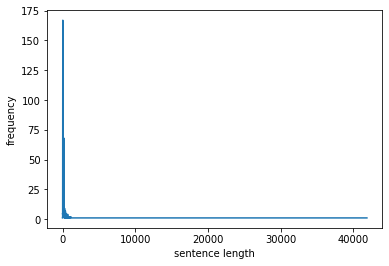

In [82]:
# plot length and frequency 
import matplotlib.pyplot as plt
plt.plot(sent_length, sent_freq)
plt.xlabel("sentence length")
plt.ylabel("frequency")
plt.savefig("frequency_plot.jpg")



In [0]:
sent_pentage_list = [(count/sum(sent_freq)) for count in accumulate(sent_freq)]

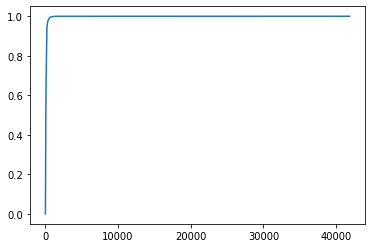

In [84]:
plt.plot(sent_length, sent_pentage_list)

In [86]:
quantile = 0.90
print(list(sent_pentage_list))
for length, per in zip(sent_length, sent_pentage_list):
    if round(per, 2) == quantile:
        index = length
        break
print("\n sentence length at %s quantile  is:%d." % (quantile, index))

[9.667440061871617e-05, 0.00019334880123743234, 0.0002900232018561485, 0.0003866976024748647, 0.0004833720030935808, 0.000580046403712297, 0.0010634184068058778, 0.0014501160092807424, 0.005220417633410673, 0.008894044856921888, 0.01285769528228925, 0.017304717710750192, 0.020784996133023974, 0.02397525135344161, 0.02793890177880897, 0.03141918020108275, 0.03557617942768755, 0.04021655065738593, 0.042923433874709975, 0.05036736272235112, 0.05955143078112916, 0.07037896365042537, 0.08110982211910286, 0.09309744779582367, 0.1058584686774942, 0.12074632637277649, 0.1368909512761021, 0.15032869296210363, 0.16395978344934262, 0.18010440835266822, 0.19508894044856923, 0.20939675174013922, 0.22012761020881672, 0.23221191028615623, 0.24651972157772623, 0.25792730085073473, 0.2695282289249807, 0.28238592420726993, 0.2955336426914153, 0.30549110595514306, 0.31786542923433875, 0.3284029389017788, 0.33807037896365044, 0.34715777262180975, 0.35498839907192575, 0.3653325599381284, 0.3746133023975251

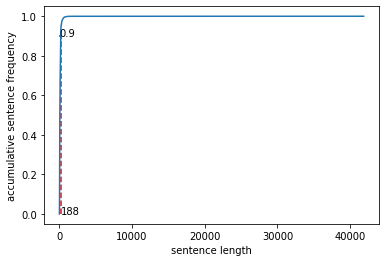

In [0]:
plt.plot(sent_length, sent_pentage_list)
plt.hlines(quantile, 0, index, colors="r", linestyles="dashed")
plt.vlines(index, 0, quantile, colors="r", linestyles="dashed")
plt.text(0, quantile, str(quantile))
plt.text(index, 0, str(index))
plt.xlabel("sentence length")
plt.ylabel("accumulative sentence frequency")
plt.savefig("sentence frequency plot.png")
plt.show()

In [28]:
import pickle
import numpy as np
import pandas as pd
from keras.utils import np_utils, plot_model
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Dense, Embedding, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Using TensorFlow backend.


In [0]:
def load_data(filepath, input_shape=190):
  
    with open(filepath, "r") as f:
      reader = csv.reader(f, delimiter="\t")
      lines = []
      for line in reader:
        lines.append(line)
    
    df = pd.DataFrame(lines[1:-1], columns =['label', 'text'])
 


    labels, vocabulary = list(df['label'].unique()), list(df['text'].unique())

    string = ''
    for word in vocabulary:
        string += word

    vocabulary = set(string)

    # dictionary 
    word_dictionary = {word: i+1 for i, word in enumerate(vocabulary)}
    with open('word_dict.pk', 'wb') as f:
        pickle.dump(word_dictionary, f)
    inverse_word_dictionary = {i+1: word for i, word in enumerate(vocabulary)}
    label_dictionary = {label: i for i, label in enumerate(labels)}
    with open('label_dict.pk', 'wb') as f:
        pickle.dump(label_dictionary, f)
    output_dictionary = {i: labels for i, labels in enumerate(labels)}

    vocab_size = len(word_dictionary.keys()) 
    label_size = len(label_dictionary.keys()) 

    # senquence filling using input shape
    x = [[word_dictionary[word] for word in sent] for sent in df['text']]
    x = pad_sequences(maxlen=input_shape, sequences=x, padding='post', value=0)
    y = [[label_dictionary[sent]] for sent in df['label']]
    y = [np_utils.to_categorical(label, num_classes=label_size) for label in y]
    y = np.array([list(_[0]) for _ in y])

    return x, y, output_dictionary, vocab_size, label_size, inverse_word_dictionary

In [0]:
from keras import regularizers

In [0]:
# built model， Embedding + LSTM + Softmax.
def create_LSTM(n_units, input_shape, output_dim, df):
    x, y, output_dictionary, vocab_size, label_size, inverse_word_dictionary = load_data(df)
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size + 1, output_dim=output_dim,
                        input_length=input_shape, mask_zero=True))
    model.add(LSTM(n_units, input_shape=(x.shape[0], x.shape[1])))
    model.add(Dropout(0.2))
    #model.add(Dense(25, activation='softmax'))
    model.add(Dense(label_size, activation='softmax',kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.01)))
    #kernel_regularizer=regularizers.l2(0.001), activity_regularizer=regularizers.l1(0.001)
    #sgd = optimizers.SGD(lr=0.05, decay=1e-6, momentum=0)#, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #adam

    plot_model(model, to_file='./model_lstm.png', show_shapes=True)
    model.summary()

    return model

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
# train model
def model_train(input_shape, filepath_train, filepath_dev, model_save_path):


    x_train, y_train, output_dictionary_train, vocab_size_train, label_size_train, inverse_word_dictionary_train = load_data(filepath_train, input_shape)
    #train_x, test_x, train_y, test_y = train_test_split(x_train, y_train, test_size = 0.116, random_state = 42)
    x_dev, y_dev, output_dictionary_dev, vocab_size_dev, label_size_dev, inverse_word_dictionary_dev = load_data(filepath_dev, input_shape)
    

    print('data loaded')
    
   
    #parameters
    n_units = 100
    batch_size = 32
    epochs = 10
    output_dim = 10

    # train the model
    lstm_model = create_LSTM(n_units, input_shape, output_dim, filepath_train)
    #lstm_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    lstm_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_dev, y_dev))
    #lstm_model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, validation_data=(test_x, test_y))


    # save the model
    lstm_model.save(model_save_path)

    # N = x_dev.shape[0]  # length
    # predict = []
    # label = []

    
    # for start, end in zip(range(0, N, 1), range(1, N+1, 1)):

    #     sentence = [inverse_word_dictionary_dev[i] for i in x_dev[start] if i != 0]
    #     y_predict = lstm_model.predict(x_dev[start:end])
    #     label_predict = output_dictionary_dev[np.argmax(y_predict[0])]
    #     label_true = output_dictionary_dev[np.argmax(y_dev[start:end])]
    #     print(''.join(sentence), label_true, label_predict) # print results
    #     predict.append(label_predict)
    #     label.append(label_true)

    # acc = accuracy_score(predict, label) # predict the accuracy
    # print('accuarcy score on validation set is: %s.' % acc)




In [88]:
if __name__ == '__main__':
    train_path = 'chn_senti_corp/train.tsv'
    dev_path = 'chn_senti_corp/test.tsv'
    input_shape = 190
    model_save_path = './corpus_model.h5'
    model_train(input_shape, train_path , dev_path, model_save_path)


data loaded
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 190, 10)           42530     
_________________________________________________________________
lstm_10 (LSTM)               (None, 100)               44400     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 202       
Total params: 87,132
Trainable params: 87,132
Non-trainable params: 0
_________________________________________________________________
Train on 9145 samples, validate on 1199 samples
Epoch 1/10
9145/9145 [==============================] - 73s 8ms/step - loss: 0.9102 - acc: 0.7051 - val_loss: 1.1715 - val_acc: 0.4721
Epoch 2/10
9145/9145 [==============================

In [0]:
# test  model
def model_test(input_shape, filepath_test, model_save_path):


    x_test, y_test, output_dictionary, vocab_size_test, label_size_test, inverse_word_dictionary = load_data(df, input_shape)
    

    print('data loaded')


    #load the model
    lstm_model = load_model(model_save_path)

    N = x_test.shape[0]  # length
    predict = []
    label = []
    
    for start, end in zip(range(0, N, 1), range(1, N+1, 1)):
        sentence = [inverse_word_dictionary[i] for i in x_test[start] if i != 0]
        y_predict = lstm_model.predict(x_test[start:end])
        label_predict = output_dictionary[np.argmax(y_predict[0])]
        label_true = output_dictionary[np.argmax(y_test[start:end])]
        print(''.join(sentence), label_true, label_predict) # print results
        predict.append(label_predict)
        label.append(label_true)

    acc = accuracy_score(predict, label) # predict the accuracy
    print('accuarcy score on test set is: %s.' % acc)

In [0]:
# Import the necessary modules
import pickle
import numpy as np
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

In [60]:
if __name__ == '__main__':
    # filepath = 'chn_senti_corp/test.tsv'
    df = df_test
    input_shape = 190
    model_save_path = './corpus_model.h5'
    model_test(input_shape, df, model_save_path)



data loaded
这个宾馆比较陈旧了，特价的房间也很一般。总体来说一般 1 1
怀着十分激动的心情放映，可是看着看着发现，在放映完毕后，出现一集米老鼠的动画片！开始还怀疑是不是赠送的个别现象，可是后来发现每张DVD后面都有！真不知道生产商怎么想的，我想看的是猫和老鼠，不是米老鼠！如果厂家是想赠送的话，那就全套米老鼠和唐老鸭都赠送，只在每张DVD后面添加一集算什么？？简直是画蛇添足！！ 0 1
还稍微重了点，可能是硬盘大的原故，还要再轻半斤就好了。其他要进一步验证。贴的几种膜气泡较多，用不了多久就要更换了，屏幕膜稍好点，但比没有要强多了。建议配赠几张膜让用用户自己贴。 0 1
交通方便；环境很好；服务态度很好 房间较小 1 0
不错，作者的观点很颠覆目前中国父母的教育方式，其实古人们对于教育已经有了很系统的体系了，可是现在的父母以及祖父母们更多的娇惯纵容孩子，放眼看去自私的孩子是大多数，父母觉得自己的孩子在外面只要不吃亏就是好事，完全把古人几千年总结的教育古训抛在的九霄云外。所以推荐准妈妈们可以在等待宝宝降临的时候，好好学习一下，怎么把孩子教育成一个有爱心、有责任心、宽容、大度的人。 1 1
有了第一本书的铺垫，读第二本的时候开始进入状态。基本上第二本就围绕主角们的能力训练展开，故事的主要发生场地设置在美洲的亚马逊丛林。心里一直疑惑这和西藏有什么关系，不过大概看完全书才能知道内里的线索。其中描述了很多热带雨林中特有的神秘动植物以及一些生存技巧和常识，受益匪浅。能够想像出要写这样一部书，融合这样许多的知识，作者需要花费多少心血来搜集和整理并成文。 1 1
前台接待太差，酒店有A B楼之分，本人check－in后，前台未告诉B楼在何处，并且B楼无明显指示；房间太小，根本不像4星级设施，下次不会再选择入住此店啦。 0 1
白色的，很漂亮，做工还可以； 2. 网上的软件资源非常丰富，这是我买它的最主要原因； 3. 电池不错，昨天从下午两点到晚上十点还有25分钟的剩余时间（关闭摄像头，无线和蓝牙）主要拷贝东西，看起来正常使用八小时左右没问题； 4. 散热不错，CPU核心不过40~55度，很多小本要上到80度了； 5. 变压器很小巧，很多小本的电源都用的是大本的电源，本倒是很轻，可旅行重量还是比较重。 1 1
在当当上买了很多书，都懒于评论。但这套书真的很好，3册都非常精彩

In [0]:
import pickle
import numpy as np
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences


# 导入字典
with open('word_dict.pk', 'rb') as f:
    word_dictionary = pickle.load(f)
with open('label_dict.pk', 'rb') as f:
    output_dictionary = pickle.load(f)



    input_shape = 180
    sent = "电视刚安装好，说实话，画质不怎么样，很差！"
    x = [[word_dictionary[word] for word in sent]]
    x = pad_sequences(maxlen=input_shape, sequences=x, padding='post', value=0)

    # 载入模型
    model_save_path = './sentiment_analysis.h5'
    lstm_model = load_model(model_save_path)

    # 模型预测
    y_predict = lstm_model.predict(x)
    label_dict = {v:k for k,v in output_dictionary.items()}

    print('输入语句: %s' % sent)
    print('情感预测结果: %s' % label_dict[np.argmax(y_predict)])